<a href="https://colab.research.google.com/github/anvq38/CS114.K21.KHTN/blob/master/Final_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SINH VIÊN : VÕ QUỐC AN**

**ID : 18520440**

**CLASS: CS114.K21.KHTN**

**UIT-VNU**

# **Mô tả đồ án**

*Tên đồ án: Nhận diện tòa nhà trong UIT*

Input: Hình ảnh một tòa nhà trong UIT 

Output: Cho biết đó là tòa nhà nào trong UIT

# **Mô tả dữ liệu**
- Cách dây dựng bộ dữ liệu: Dataset tự chụp cùng với 3 bạn có chung đề tài Trần Đình Khang, Nguyễn Khánh Toàn và Nguyễn Trần Trung.

- Dataset có 1096 bức ảnh chia thành 5 labels: A, B, C, D và CT


## Load dữ liệu từ drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
from keras import models
from skimage.feature import hog

##Xử lí dữ liệu

- Resize ảnh về kích thước 256x256

- Gắn nhãn

In [3]:
def Load_images(path):
  images = []
  labels = []
  for folder_images in os.listdir(path):
    for file_image in os.listdir(path + '/' + folder_images):
      if file_image.endswith('.jpg') or  file_image.endswith('.JPG'):
        img = cv2.imread(path + '/' + folder_images + '/' + file_image, 1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
        images.append(img)
        labels.append(folder_images)
  return images, labels

In [4]:
images, labels = Load_images('/content/gdrive/My Drive/dataset')

In [5]:
len(labels)

1096

## Rút trích đặc trưng

Rút trích đặc trưng ảnh ta sẽ thu được vector đặc trưng của ảnh.(Mã hóa hình ảnh thành một vector, và vector này mang những đặc trưng là các số thực đại diện cho ảnh đó).

Sử dụng phương pháp HOG để rút trích đặc trưng.

In [6]:
from skimage.feature import hog
def feature_extraction(image):
    feature = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True)
    feature = feature.ravel()
    return feature

In [7]:
def get_feature(images):
    features = []
    for image in images:
        feature = feature_extraction(image)
        features.append(feature)
    return features

In [8]:
feature_images = get_feature(images)

In [9]:
feature_images = np.asarray(feature_images)
labels = np.asarray(labels)

In [10]:
print(feature_images.shape)

(1096, 34596)


E


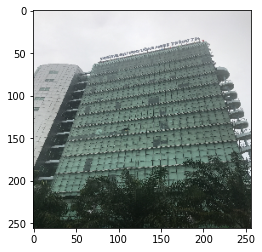

In [11]:
print(labels[540])
plt.imshow(images[540])

## Phân chia dữ liệu

In [12]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(feature_images, labels, test_size = 0.2, random_state = 43)

# **Các thuật toán máy học**
Chọn model để train dữ liệu

Sử dụng các thuật toán classification: Support Vector Machine, Linear Support Vector, Decision Tree, K-nearest Neighbors, Logistic Regression

Accuracy(độ chính xác): Là tỉ lệ giữa số điểm dự đoán đúng trên tổng số điểm trong tập dữ liệu.

Precision: Là tỉ lệ số điểm true positive trong số những điểm được phân loại là positive

Precision = TP/(TP + FP)

Recall: Là tỉ lệ số điểm true positive trong số những điểm thực sự là positive

Recall = TP/(TP + FN)

F1-score: là harmonic mean của precision và recall

F1-score = 2(precision * recall)/(precision + recall)




## Support Vector Machine

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(train_images, train_labels)
SVM_pred = SVM.predict(test_images)
SVM_score = accuracy_score(test_labels, SVM_pred)
SVM_report = classification_report(test_labels, SVM_pred)
print('Score = ', SVM_score)
print(SVM_report)

Score =  0.7954545454545454
              precision    recall  f1-score   support

           B       0.81      0.75      0.78        57
           C       0.80      0.88      0.83        49
          CT       0.54      0.64      0.58        22
           D       0.94      0.85      0.89        34
           E       0.82      0.79      0.81        58

    accuracy                           0.80       220
   macro avg       0.78      0.78      0.78       220
weighted avg       0.80      0.80      0.80       220



In [14]:
from joblib import dump, load
dump(SVM, 'SVM.joblib')

['SVM.joblib']

##  Linear Support Vector

In [15]:
from sklearn.svm import LinearSVC
Linear = LinearSVC(max_iter= 5000)
Linear.fit(train_images, train_labels)
Linear_pred = Linear.predict(test_images)
Linear_score = accuracy_score(test_labels, Linear_pred)
Linear_report = classification_report(test_labels, Linear_pred)
print('Score: ', Linear_score)
print(Linear_report)

Score:  0.8090909090909091
              precision    recall  f1-score   support

           B       0.85      0.82      0.84        57
           C       0.78      0.86      0.82        49
          CT       0.62      0.68      0.65        22
           D       0.91      0.85      0.88        34
           E       0.82      0.78      0.80        58

    accuracy                           0.81       220
   macro avg       0.80      0.80      0.80       220
weighted avg       0.81      0.81      0.81       220



In [16]:
dump(Linear, 'Linear.joblib')

['Linear.joblib']

## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(train_images, train_labels)
DTC_pred = DTC.predict(test_images)
DTC_score = accuracy_score(test_labels, DTC_pred)
DTC_report = classification_report(test_labels, DTC_pred)
print('Score = ', DTC_score)
print(DTC_report)

Score =  0.42727272727272725
              precision    recall  f1-score   support

           B       0.52      0.46      0.49        57
           C       0.50      0.53      0.51        49
          CT       0.11      0.18      0.14        22
           D       0.45      0.44      0.45        34
           E       0.46      0.40      0.43        58

    accuracy                           0.43       220
   macro avg       0.41      0.40      0.40       220
weighted avg       0.45      0.43      0.44       220



In [18]:
dump(DTC, 'DecisionTree.joblib')

['DecisionTree.joblib']

## K-nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(train_images, train_labels)
KNN_pred = KNN.predict(test_images)
KNN_score = accuracy_score(test_labels, KNN_pred)
KNN_report = classification_report(test_labels, KNN_pred)
print('Score = ', KNN_score)
print(KNN_report)

Score =  0.37272727272727274
              precision    recall  f1-score   support

           B       1.00      0.12      0.22        57
           C       1.00      0.22      0.37        49
          CT       0.16      0.64      0.26        22
           D       0.32      0.82      0.46        34
           E       0.79      0.38      0.51        58

    accuracy                           0.37       220
   macro avg       0.65      0.44      0.36       220
weighted avg       0.75      0.37      0.37       220



In [20]:
dump(KNN, 'KNeighbors.joblib')

['KNeighbors.joblib']

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear', multi_class='ovr')
LR.fit(train_images, train_labels)
LR_pred = LR.predict(test_images)
LR_score = accuracy_score(test_labels, LR_pred)
LR_report = classification_report(test_labels, LR_pred)
print('Score = ', LR_score)
print(LR_report)

Score =  0.8
              precision    recall  f1-score   support

           B       0.85      0.77      0.81        57
           C       0.76      0.86      0.81        49
          CT       0.62      0.68      0.65        22
           D       0.94      0.88      0.91        34
           E       0.79      0.78      0.78        58

    accuracy                           0.80       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.80      0.80      0.80       220



In [22]:
dump(LR, 'LogisticRegression.joblib')

['LogisticRegression.joblib']

# **Đánh giá các model với KFLod**

SVM: 0.802534 (0.038470)
DTC: 0.373224 (0.050048)
KNN: 0.394749 (0.055073)
LR: 0.817359 (0.035220)


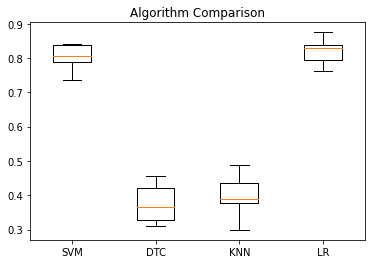

In [23]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
train_images, test_images, train_labels, test_labels = train_test_split(feature_images, labels, test_size = 0.2, random_state = 43)
models = []
models.append(('SVM', SVC()))
#models.append(('LinearSVC', LinearSVC(max_iter = 5000)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

results = []
names = []
for name, model in models:
  kfold = KFold(n_splits= 10, random_state = 43, shuffle= True)
  cv_results = cross_val_score(model, train_images, train_labels, cv=kfold)
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

# Test trên dữ liệu mới

In [24]:
test_IM, test_LB = Load_images('/content/gdrive/My Drive/testset')

In [25]:
feature_IM = get_feature(test_IM)
feature_IM = np.asarray(feature_IM)
test_LB = np.asarray(test_LB)
print(feature_IM.shape)

(461, 34596)


In [26]:
for model in [SVM, Linear, DTC, KNN, LR]:
    Pred = model.predict(feature_IM)
    Score = model.score(feature_IM, test_LB)
    print(classification_report(test_LB, Pred))
    print(model.__class__.__name__, Score)

              precision    recall  f1-score   support

           B       0.61      0.41      0.49       101
           C       0.35      0.20      0.26        85
          CT       0.73      0.80      0.76        89
           D       1.00      0.94      0.97        95
           E       0.39      0.68      0.49        91

    accuracy                           0.61       461
   macro avg       0.62      0.60      0.59       461
weighted avg       0.62      0.61      0.60       461

SVC 0.6073752711496746
              precision    recall  f1-score   support

           B       0.48      0.25      0.33       101
           C       0.36      0.18      0.24        85
          CT       0.71      0.84      0.77        89
           D       0.95      0.93      0.94        95
           E       0.35      0.65      0.45        91

    accuracy                           0.57       461
   macro avg       0.57      0.57      0.55       461
weighted avg       0.57      0.57      0.55       461


# **Kết luận**
Train bằng model SVC và LR cho kết quả tốt

Trên tập train: 
SVC 0.795, LR 0.8

Trên tập test: 
SVC 0.6, LR 0.58

Train model trên tập test cho kết quả xấu hơn khi train model trên tập train




# Sử dụng model để dự đoán một bức ảnh

## Sử dụng bức ảnh có trong drive

In [27]:
def Pred_image(path):
  img = cv2.imread(path , 1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (256, 256))
  #plt.imshow(path)
  img = feature_extraction(img)
  img = img.reshape(1, img.shape[0])
  for folder in os.listdir('/content'):
    if folder.endswith('.joblib'):
      path = '/content/' + folder
      clf = load(path)
      print(os.path.splitext(os.path.basename(path))[0], ':', clf.predict(img)[0])

In [28]:
path = input()
Pred_image(path)

/content/gdrive/My Drive/dataset/E/IMG_3837.JPG
SVM : E
LogisticRegression : E
KNeighbors : CT
DecisionTree : E
Linear : E


## Chụp một ảnh mới

In [29]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


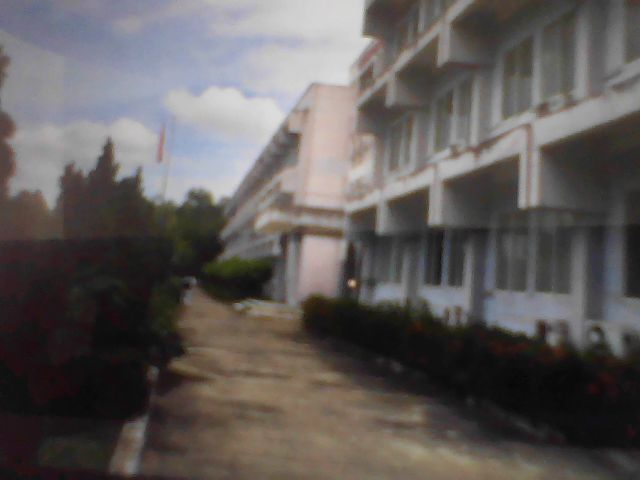

SVM : C
LogisticRegression : C
KNeighbors : D
DecisionTree : C
Linear : C


In [38]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Pred_image('/content/photo.jpg')